In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from collections import Counter

In [83]:
df = pd.read_csv("sleep_3000.csv")
label = df["Sleep Disorder"]
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("None")
df = df.drop("Person ID",axis = 1)
df.replace('_RARE_', np.nan, inplace=True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,39,Lawyer,5.9,8,60,7,Normal,130/85,68,8000,None
1,Female,39,Accountant,6.0,6,60,4,Overweight,115/75,78,7000,None
2,Female,35,Engineer,5.9,7,80,8,Normal,120/80,65,8000,None
3,Female,48,Engineer,6.0,8,30,8,Normal,125/80,65,7000,None
4,Male,28,Doctor,7.7,5,90,6,Normal,NaN,70,8000,None


# **Exploratory Data Analysis**

<Figure size 640x480 with 0 Axes>

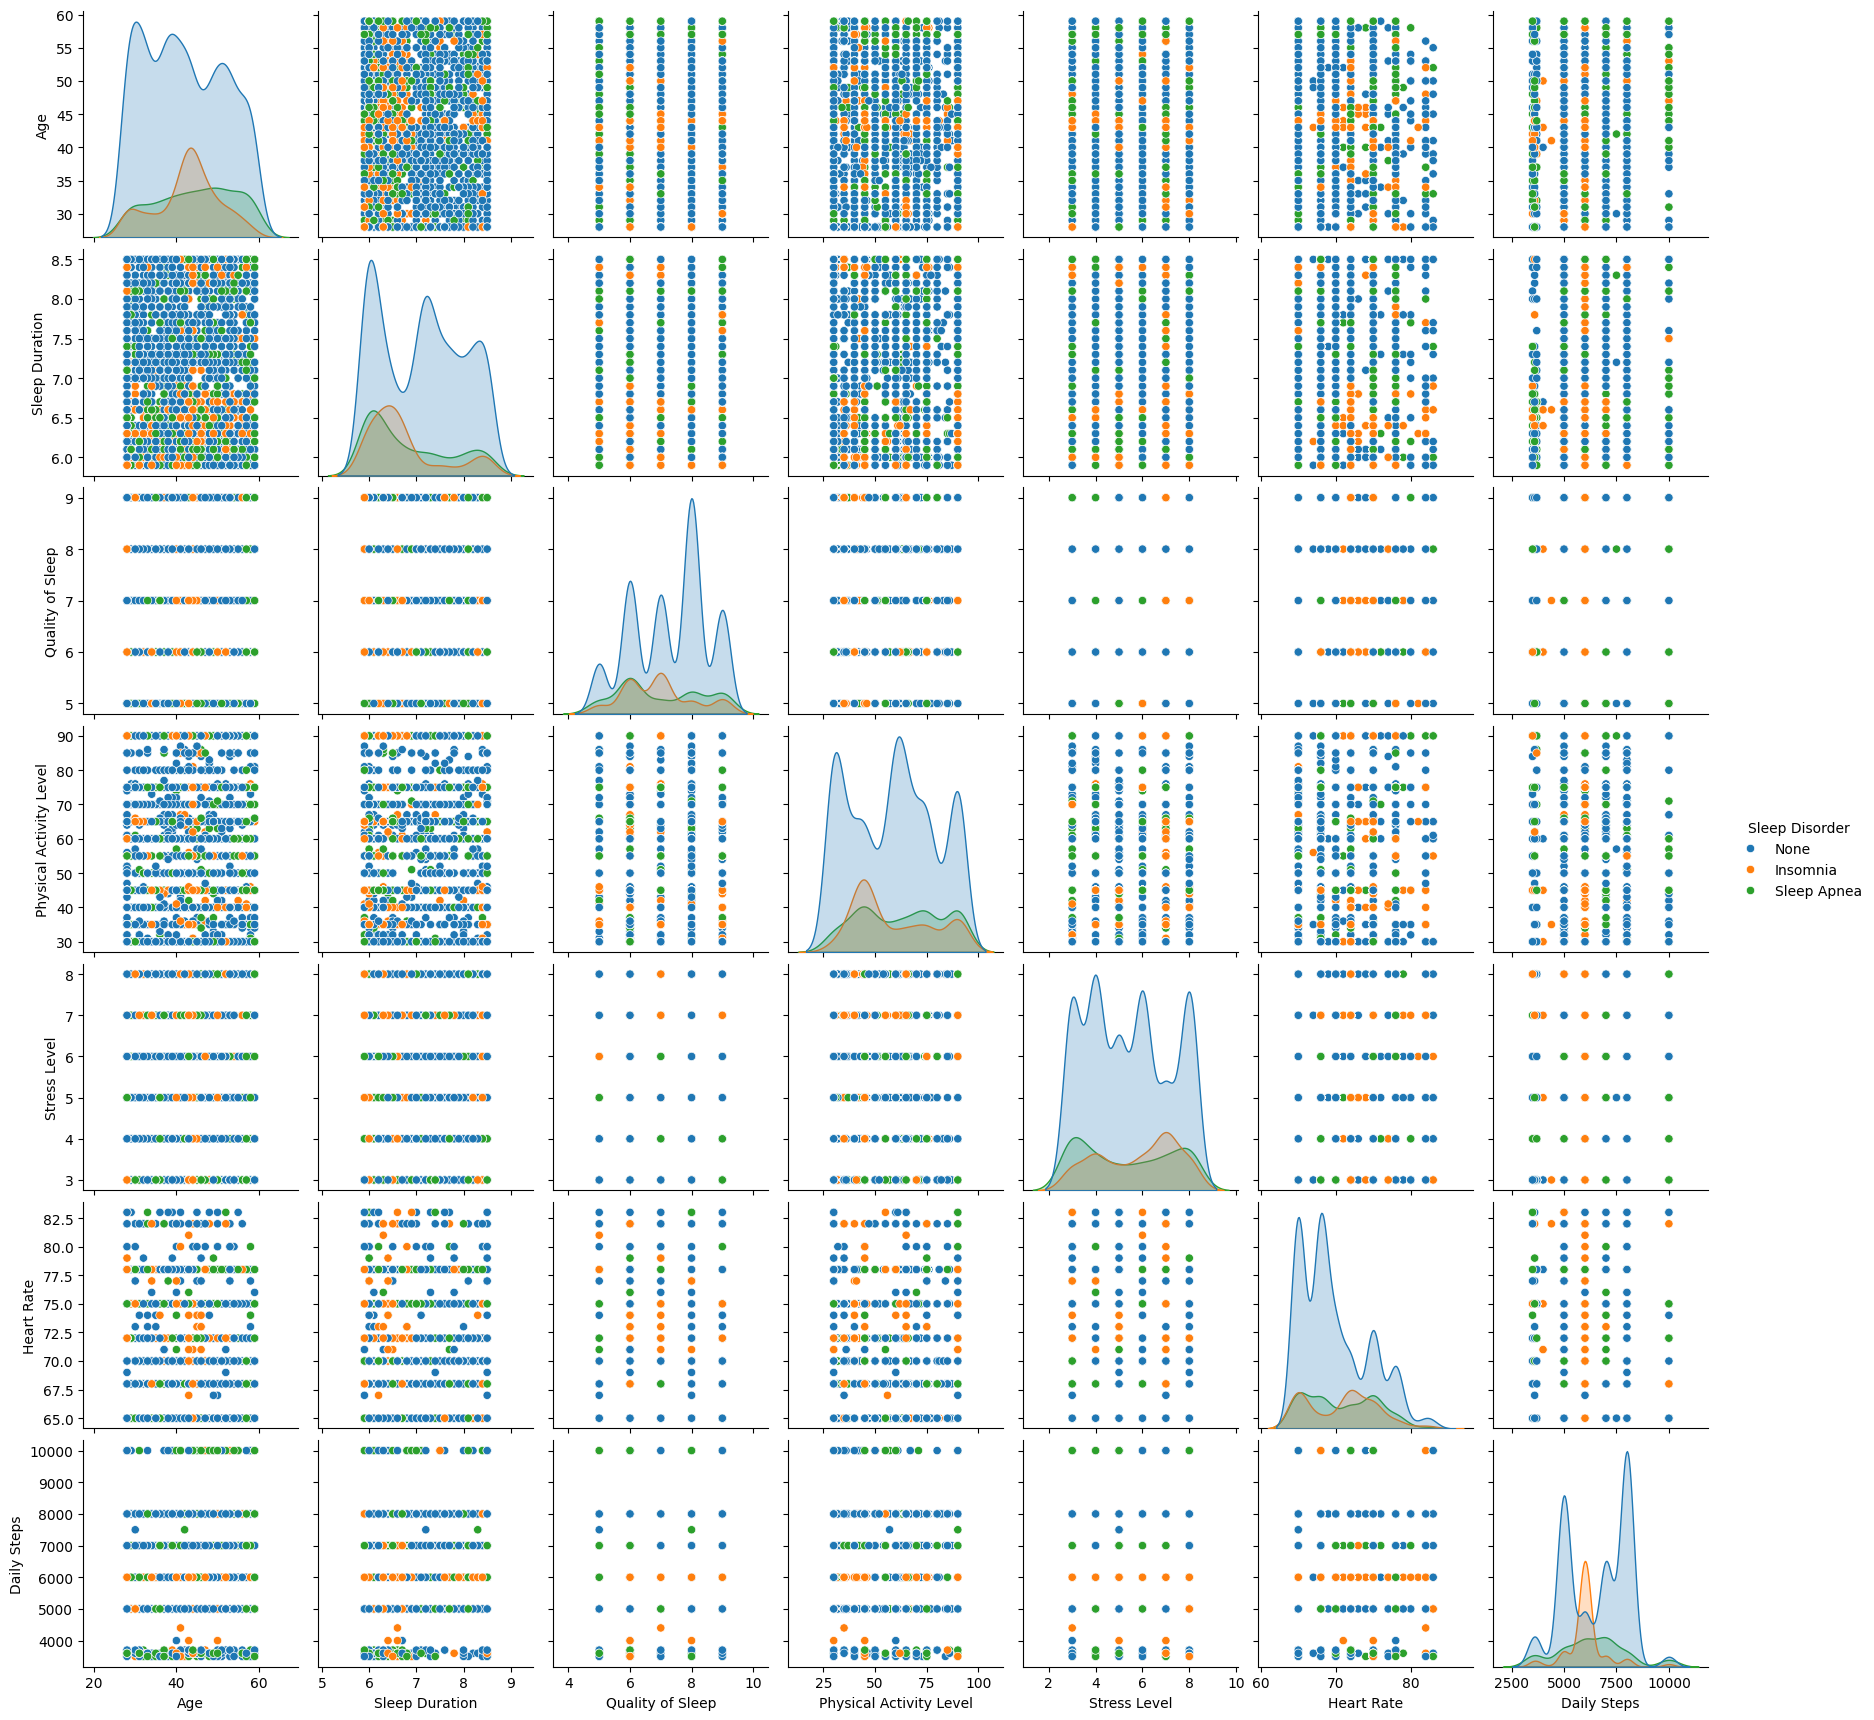

In [15]:
plt.figure()
sns.pairplot(df,hue="Sleep Disorder")
plt.show()

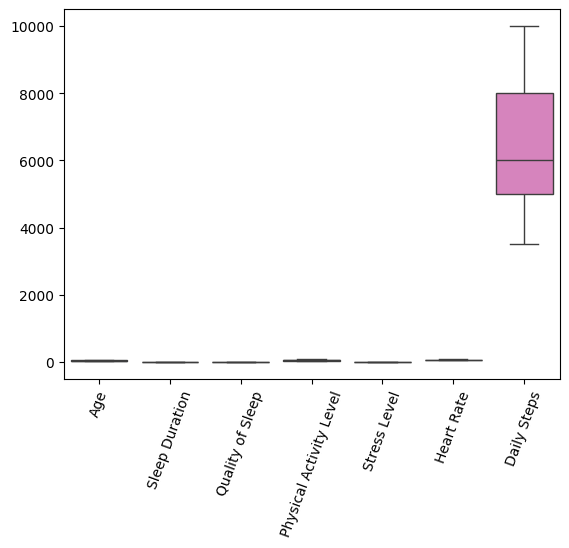

In [16]:
plt.figure()
sns.boxplot(df)
plt.xticks(rotation=70)
plt.show()

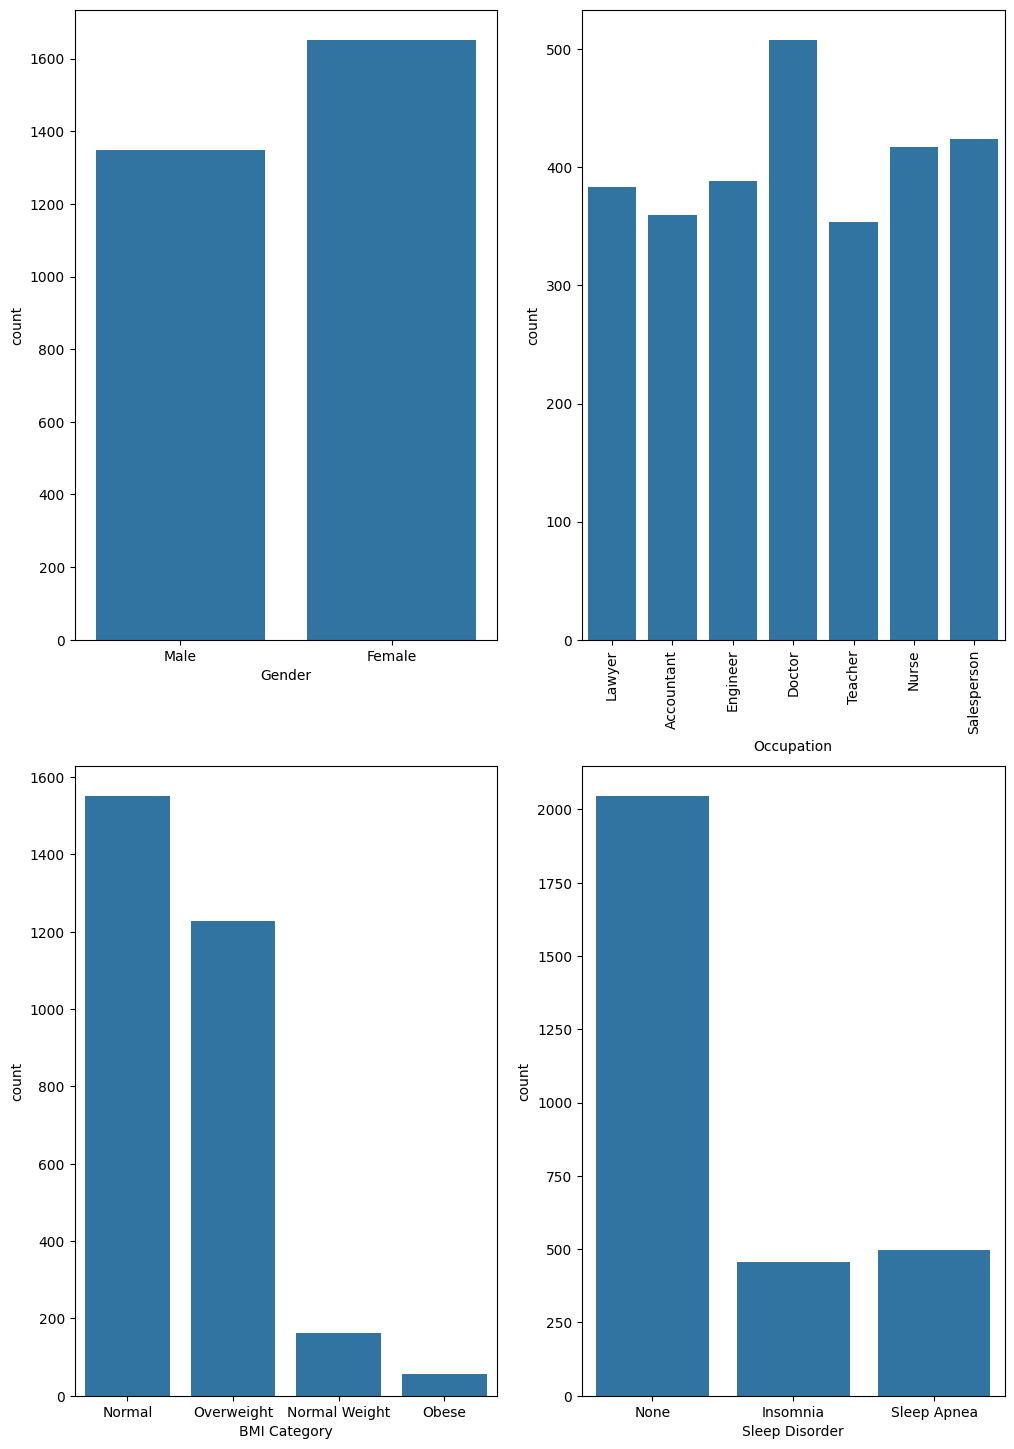

In [17]:
plt.figure(figsize=(12,18))
plt.subplot(2,2,1)
sns.countplot(df,x='Gender')

plt.subplot(2,2,2)
sns.countplot(df,x='Occupation')
plt.xticks(rotation = 90)

plt.subplot(2,2,3)
sns.countplot(df,x='BMI Category')

plt.subplot(2,2,4)
sns.countplot(df,x='Sleep Disorder')

plt.show()

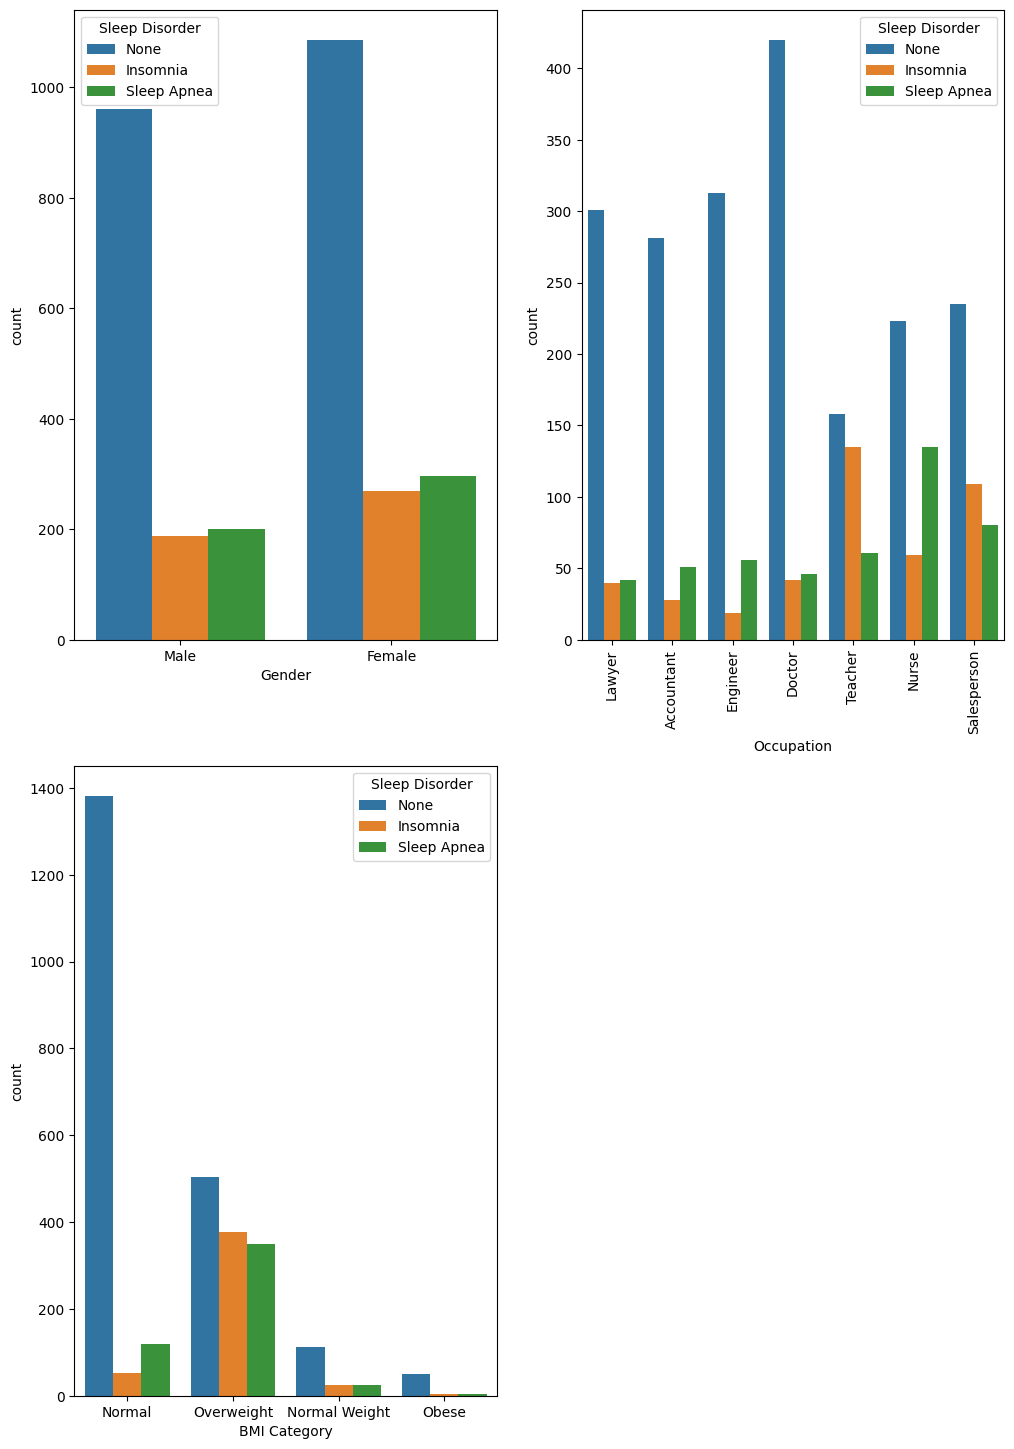

In [21]:
plt.figure(figsize=(12,18))
plt.subplot(2,2,1)
sns.countplot(df,x='Gender',hue='Sleep Disorder')

plt.subplot(2,2,2)
sns.countplot(df,x='Occupation',hue='Sleep Disorder')
plt.xticks(rotation = 90)

plt.subplot(2,2,3)
sns.countplot(df,x='BMI Category',hue='Sleep Disorder')

plt.show()

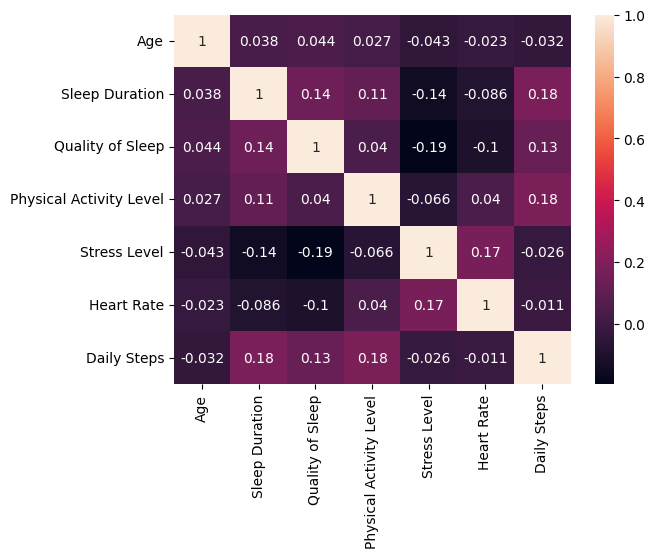

In [18]:
plt.figure()
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix,annot=True);
plt.show()

In [ ]:
!pip install ydata-profiling
import ydata_profiling
report = df.profile_report(title="Sleep Data Analysis")
report.to_notebook_iframe()

# **Data Preprocessing**

In [84]:
print(df.isna().sum())

Gender                       0
Age                          0
Occupation                 166
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure             218
Heart Rate                   0
Daily Steps                  0
Sleep Disorder               0
dtype: int64


In [85]:
df[['Systolic','Diastolic']] = df['Blood Pressure'].str.split('/',expand=True).apply(pd.to_numeric, errors='coerce')
df = pd.get_dummies(df,columns=["Occupation"],prefix="Occupation")
df.drop('Blood Pressure',axis=1,inplace=True)
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher
0,Male,39,5.9,8,60,7,Normal,68,8000,None,130.0,85.0,False,False,False,True,False,False,False
1,Female,39,6.0,6,60,4,Overweight,78,7000,None,115.0,75.0,True,False,False,False,False,False,False
2,Female,35,5.9,7,80,8,Normal,65,8000,None,120.0,80.0,False,False,True,False,False,False,False
3,Female,48,6.0,8,30,8,Normal,65,7000,None,125.0,80.0,False,False,True,False,False,False,False
4,Male,28,7.7,5,90,6,Normal,70,8000,None,NaN,NaN,False,True,False,False,False,False,False


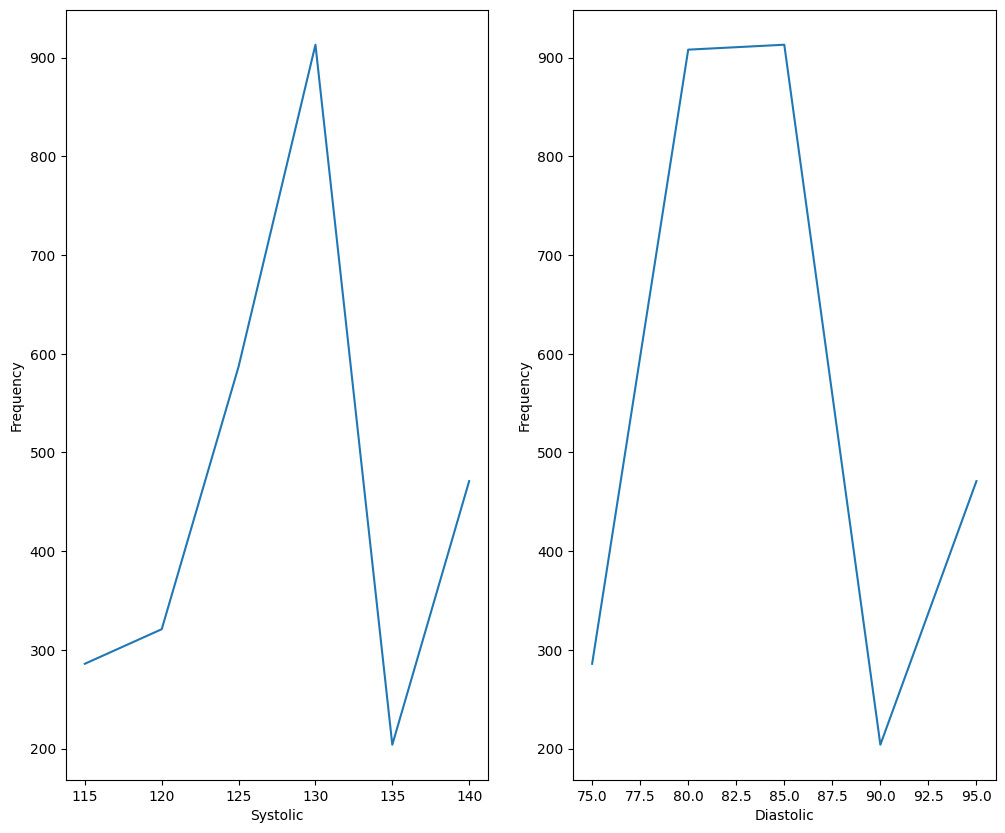

In [86]:
high_count = df['Systolic'].value_counts()
low_count = df['Diastolic'].value_counts()

high_count.sort_index(inplace = True)
low_count.sort_index(inplace = True)

plt.figure(figsize=(12, 10))
plt.subplot(1,2,1)
plt.plot(high_count.index,high_count.values)
plt.xlabel('Systolic')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.plot(low_count.index,low_count.values)
plt.xlabel('Diastolic')
plt.ylabel('Frequency')

plt.show()

In [ ]:
df['Systolic'].fillna(df['Systolic'].mean(), inplace=True)
df['Diastolic'].fillna(df['Diastolic'].median(), inplace=True)

In [88]:
print(df.isna().sum())

Gender                     0
Age                        0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Systolic                   0
Diastolic                  0
Occupation_Accountant      0
Occupation_Doctor          0
Occupation_Engineer        0
Occupation_Lawyer          0
Occupation_Nurse           0
Occupation_Salesperson     0
Occupation_Teacher         0
dtype: int64


In [89]:
df.duplicated().sum()

0

In [90]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,42.526000,7.017333,7.197000,59.496333,5.440667,70.093667,6447.466667,128.308771,84.443333
std,9.397984,0.873552,1.232084,20.216401,1.777507,4.554610,1457.136918,7.197675,5.848207
min,28.000000,5.900000,5.000000,30.000000,3.000000,65.000000,3500.000000,115.000000,75.000000
25%,34.000000,6.200000,6.000000,45.000000,4.000000,65.000000,5000.000000,125.000000,80.000000
50%,43.000000,7.000000,7.000000,60.000000,5.000000,68.000000,6000.000000,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,75.000000,8000.000000,130.000000,85.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,83.000000,10000.000000,140.000000,95.000000


In [91]:
from sklearn.preprocessing import StandardScaler
numerical_features = ["Age","Sleep Duration","Quality of Sleep","Physical Activity Level","Stress Level","Heart Rate","Daily Steps","Diastolic","Systolic"]
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
count,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03
mean,-3.659295e-16,1.515825e-16,-5.447494e-17,6.276461e-17,-2.155313e-16,5.925630e-16,2.865856e-16,-3.276786e-15,9.284425e-16
std,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00
min,-1.545908e+00,-1.279282e+00,-1.783455e+00,-1.459273e+00,-1.373313e+00,-1.118540e+00,-2.023117e+00,-1.849346e+00,-1.615009e+00
25%,-9.073671e-01,-9.357991e-01,-9.716868e-01,-7.171776e-01,-8.106334e-01,-1.118540e+00,-9.935291e-01,-4.597766e-01,-7.599037e-01
50%,5.044476e-02,-1.984566e-02,-1.599184e-01,2.491792e-02,-2.479540e-01,-4.597574e-01,-3.071374e-01,2.350080e-01,9.520174e-02
75%,7.954095e-01,8.961078e-01,6.518501e-01,7.670134e-01,8.774046e-01,1.077403e+00,1.065646e+00,2.350080e-01,9.520174e-02
max,1.753221e+00,1.697567e+00,1.463619e+00,1.509109e+00,1.440084e+00,2.834158e+00,2.438429e+00,1.624577e+00,1.805413e+00


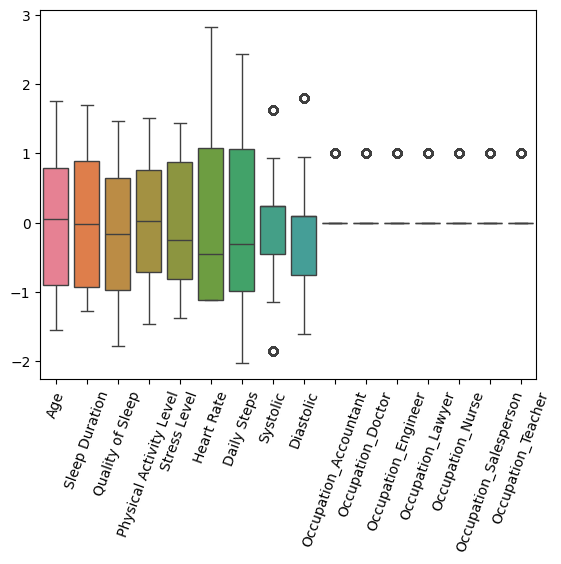

In [92]:
plt.figure()
sns.boxplot(df)
plt.xticks(rotation=70)
plt.show()

In [93]:
categorical_columns = ["Gender","BMI Category"]
le = LabelEncoder()
for column in categorical_columns:
  df[column] = le.fit_transform(df[column])

df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher
0,1,-0.375249,-1.279282,0.651850,0.024918,0.877405,0,-0.459757,1.065646,None,2.350080e-01,0.095202,False,False,False,True,False,False,False
1,0,-0.375249,-1.164787,-0.971687,0.024918,-0.810633,3,1.736186,0.379254,None,-1.849346e+00,-1.615009,True,False,False,False,False,False,False
2,0,-0.800944,-1.279282,-0.159918,1.014379,1.440084,0,-1.118540,1.065646,None,-1.154561e+00,-0.759904,False,False,True,False,False,False,False
3,0,0.582562,-1.164787,0.651850,-1.459273,1.440084,0,-1.118540,0.379254,None,-4.597766e-01,-0.759904,False,False,True,False,False,False,False
4,1,-1.545908,0.781614,-1.783455,1.509109,0.314725,0,-0.020569,1.065646,None,-3.949393e-15,0.095202,False,True,False,False,False,False,False


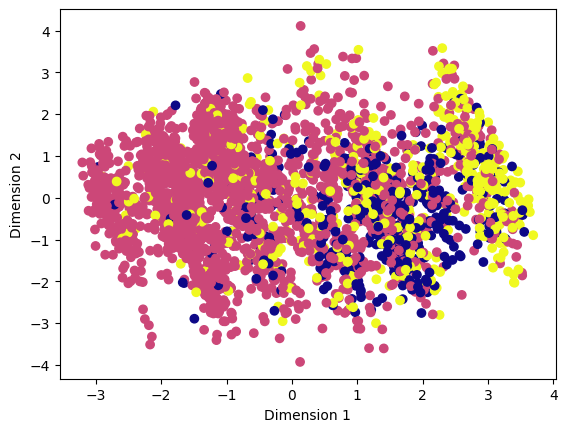

In [75]:
from sklearn.decomposition import PCA
X = df.drop('Sleep Disorder', axis=1)
y = df["Sleep Disorder"]
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)
y = le.fit_transform(y)

plt.figure()
plt.scatter(X_transformed[:,0],X_transformed[:,1],c=y,cmap="plasma")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# **Model Training**

In [94]:
from imblearn.over_sampling import SMOTE  # Class imabalance handling
# label=label.tolist()
y = df["Sleep Disorder"]
X = df.drop("Sleep Disorder",axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.80)
counter_before = Counter(y_train)
print("Before oversampling : ",counter_before)
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train,y_train)
counter_after = Counter(y_train)
print("After oversampling : ",counter_after)

Before oversampling :  Counter({'None': 1630, 'Sleep Apnea': 404, 'Insomnia': 366})
After oversampling :  Counter({'None': 1630, 'Sleep Apnea': 1630, 'Insomnia': 1630})


In [95]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)

accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Naive Bayes Accuracy: {accuracy_gnb:.4f}")

Naive Bayes Accuracy: 0.6583


In [96]:
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(random_state=42)


dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"Decision Tree Accuracy: {accuracy_dtc:.4f}")

Decision Tree Accuracy: 0.6267


In [97]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"Random Forest Accuracy: {accuracy_rfc:.4f}")

Random Forest Accuracy: 0.7250


In [80]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

perceptron.fit(X_train, y_train)

y_pred_perceptron = perceptron.predict(X_test)

accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
print(f"Perceptron Accuracy: {accuracy_perceptron:.4f}")

Perceptron Accuracy: 0.5650


In [98]:
from sklearn.ensemble import VotingClassifier

clf1 = GaussianNB()
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = RandomForestClassifier(n_estimators=100, random_state=42)
clf4 = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

ensemble = VotingClassifier(
    estimators=[('gnb', clf1), ('dtc', clf2), ('rfc', clf3), ('per', clf4)],
    voting='hard'
)


ensemble.fit(X_train, y_train)

y_pred_ensemble = ensemble.predict(X_test)

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy_ensemble:.4f}")

Ensemble Model Accuracy: 0.6883


In [99]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
# param_grid={
#     'n_estimators': [300],
#     'max_depth': [None],
#     'min_samples_split': [5],
#     'min_samples_leaf': [2],
# }

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)


best_rfc = grid_search.best_estimator_
best_rfc.fit(X_train, y_train)


y_pred_best_rfc = best_rfc.predict(X_test)

accuracy_best_rfc = accuracy_score(y_test, y_pred_best_rfc)
print(f"Optimized Random Forest Accuracy: {accuracy_best_rfc:.4f}")
# print(classification_report(y_test, y_pred_best_rfc, target_names=le.classes_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Optimized Random Forest Accuracy: 0.7317


In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 3  
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy:{accuracy :.4f}')

Accuracy:0.6283


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy :.4f}')

Accuracy: 0.6700
